# Przygotowanie bazy danych

In [26]:
#instalacja pakietu gdown
!pip install -U --no-cache-dir gdown --pre

#pobieranie zip-a ze zdjęciami
!gdown 1MWMTJt9fn-62pN7mFhKQKKZRlX4gh4UF -O veh_img.zip

#rozpakowywanie pliku veh_img.zip
!unzip -q veh_img.zip

Downloading...
From (original): https://drive.google.com/uc?id=1MWMTJt9fn-62pN7mFhKQKKZRlX4gh4UF
From (redirected): https://drive.google.com/uc?id=1MWMTJt9fn-62pN7mFhKQKKZRlX4gh4UF&confirm=t&uuid=e2f465cb-bed7-4474-8da5-e4ea8a1624a0
To: /content/veh_img.zip
100% 3.97G/3.97G [00:50<00:00, 78.4MB/s]


### Czytanie plików w katalogu data

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import glob

from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Sequential

In [28]:
image_count = len(list(glob.glob('veh_img/**/*')))
print(f'{image_count} examples of places')

5587 examples of places


In [29]:
rickshaws_count = len(list(glob.glob('veh_img/Auto Rickshaws/*')))
bikes_count = len(list(glob.glob('veh_img/Bikes/*')))
cars_count = len(list(glob.glob('veh_img/Cars/*')))
motorcycles_count = len(list(glob.glob('veh_img/Motorcycles/*')))
planes_count = len(list(glob.glob('veh_img/Planes/*')))
ships_count = len(list(glob.glob('veh_img/Ships/*')))
trains_count = len(list(glob.glob('veh_img/Trains/*')))

print(f'Auto Rickshaws: {rickshaws_count}')
print(f'Bikes: {bikes_count}')
print(f'Cars: {cars_count}')
print(f'Motorcycles: {motorcycles_count}')
print(f'Planes: {planes_count}')
print(f'Ships: {ships_count}')
print(f'Trains: {trains_count}')

Auto Rickshaws: 800
Bikes: 800
Cars: 790
Motorcycles: 800
Planes: 800
Ships: 797
Trains: 800


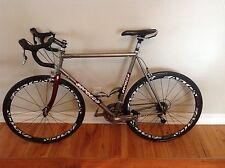

In [30]:
cities = list(glob.glob('veh_img/Bikes/*'))
PIL.Image.open(str(cities[2]))

In [31]:
batch_size = 32
class_count = 7

img_height = 64
img_width = 64

In [32]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'veh_img',
  validation_split=0.2,
  subset='training',
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'veh_img',
  validation_split=0.2,
  subset='validation',
  seed=1,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5587 files belonging to 7 classes.
Using 4470 files for training.
Found 5587 files belonging to 7 classes.
Using 1117 files for validation.


In [33]:
class_names = train_ds.class_names
print(f'class names: {class_names}')

class names: ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains']


In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
model = Sequential([
      layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(class_count)
      ])

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 548,903 (2.09 MB)

 Trainable params: 548,903 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
epochs=20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 102s 172ms/step - accuracy: 0.3711 - loss: 1.6284 - val_accuracy: 0.6741 - val_loss: 0.9337
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.7295 - loss: 0.8147 - val_accuracy: 0.7305 - val_loss: 0.7614
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8015 - loss: 0.6012 - val_accuracy: 0.7583 - val_loss: 0.7093
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8294 - loss: 0.5253 - val_accuracy: 0.7654 - val_loss: 0.7055
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8575 - loss: 0.4260 - val_accuracy: 0.7995 - val_loss: 0.5806
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8994 - loss: 0.3020 - val_accuracy: 0.8209 - val_loss: 0.5540
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9239 - loss: 0.2278 - val_accuracy: 0.7914 - val_loss: 0.7347
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9391 - loss: 0.1857 - val_accurac

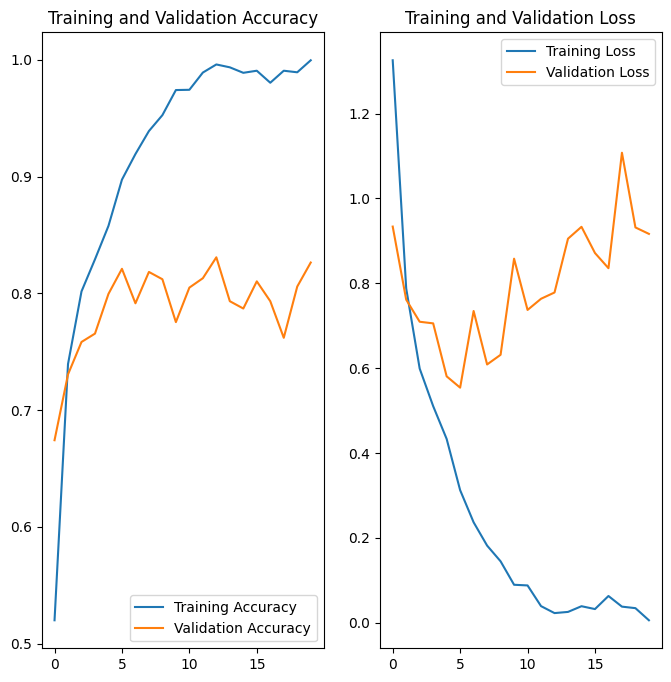

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(val_ds, model):
    y_pred = []
    y_true = []

    for batch_images, batch_labels in val_ds:
        predictions = model.predict(batch_images, verbose=0)
        y_pred = y_pred + np.argmax(tf.nn.softmax(predictions), axis=1).tolist()
        y_true = y_true + batch_labels.numpy().tolist()

    cm = confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred, target_names=class_names))
    print(cm)

    return cm

cm = evaluate_model(val_ds, model)

                precision    recall  f1-score   support

Auto Rickshaws       0.80      0.84      0.82       155
         Bikes       0.93      0.92      0.92       153
          Cars       0.77      0.75      0.76       163
   Motorcycles       0.78      0.82      0.80       165
        Planes       0.83      0.83      0.83       150
         Ships       0.84      0.82      0.83       153
        Trains       0.84      0.81      0.83       178

      accuracy                           0.83      1117
     macro avg       0.83      0.83      0.83      1117
  weighted avg       0.83      0.83      0.83      1117

[[130   2   8   8   3   1   3]
 [  2 140   0   8   1   2   0]
 [ 14   1 123   7   5   3  10]
 [  5   4   8 136   3   2   7]
 [  2   1   5   4 124   9   5]
 [  3   0   9   4   9 125   3]
 [  6   3   6   7   5   6 145]]


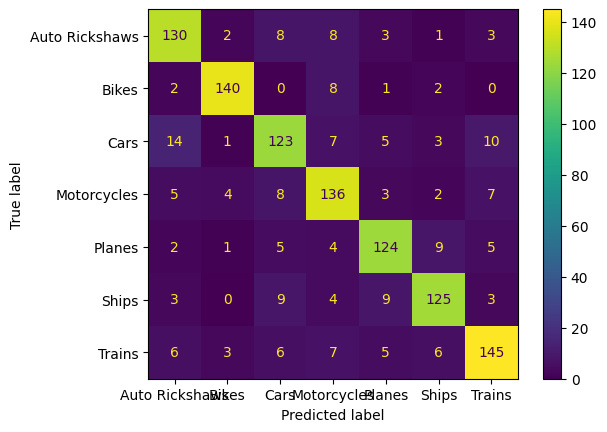

In [40]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()